# Исследование объявлений о продаже квартир 

## Обзор данных 

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

И запишем информацию в датафрейм.

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

Изучим стандартную информацию о датасете.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Вывод**

У данных обнаружено множество недостатков:
* большое количество пропусков;
* формат данных в столбцах не соответствует данным;
* выбросы и подозрительные значения в столбцах `last_price`, `total_area`, `rooms`, `ceiling_height` и `floors_total`.

Поэтому перед исследованием необходимо провести предобработку данных.

## Предобработка данных

### Работа с пропущенными значениями

Начнем предобработку данных с самого простого - анализа и устранения пропусков. 

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.is_apartment.unique()

array([nan, False, True], dtype=object)

Определим столбцы для заполнения: `floors_total`, `living_area`, `balcony` и `locality_name`. В остальных столбцах слишком много пропущенных значений, заполнение их искусственными методами может повлиять на статистику, поэтому оставим их в таком виде. При этом пропуски в `balcony` можно приравнять к отсутствию балкона и заполнить 0, так как наличие балкона - важная информация и продавец скорее всего проследил бы за тем, чтобы в объявлении она была.

Сразу обратим внимание на столбец `floors_total`, в нем всего 86 пропусков. Для нашего анализа их вполне резонно  заполнить медианным значением по всему столбцу и выполнить проверку, чтобы `floor` был меньше `floors_total`.

In [8]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data.loc[(data['floors_total'] < data['floor']), 'floors_total'] = data['floor']

Cтолбец `living_area` так же можно заполнить исходя из медианного значения жилой площади по каждому количеству комнат.

In [9]:
# Рассчитаем медианное значение жилой площади для каждого типа квартир по комнатам

data_living_area_median = data.groupby('rooms')['living_area'].median()
print('data_living_area_median')
print(data_living_area_median)
print()

# Заменим пропуски на медианное значение и выполним проверку согласно которой total_area должно быть меньше
# living_area, умноженной на коэфициент среднего отношения данных характеристик и на некоторый запас 1.2 и 
# увеличим несоответствующие значения сразу для всего столбца

k = data['total_area'].mean() / data['living_area'].mean()
print('total_area / living_area =', k)
print()

for i in range(len(data)):
    if pd.isna(data.loc[i,'living_area']):
        data.loc[i,'living_area'] = data_living_area_median[data.loc[i,'rooms']]
    if data.loc[i,'total_area'] <= (data.loc[i,'living_area'] * k):
        data.loc[i,'total_area'] = (data.loc[i,'living_area'] * k * 1.2)

data_living_area_median
rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

total_area / living_area = 1.751375861996321



Проверим заполнение столбца. 

In [10]:
print('Квартиры с жилой площадью большей, чем общей:', len(data[data['living_area'] > data['total_area']]))  
print('Оставшиеся пропуски:', data['living_area'].isna().sum())

Квартиры с жилой площадью большей, чем общей: 0
Оставшиеся пропуски: 0


Балконы. Как говорилось ранее заполним балконы `0`.

In [11]:
data['balcony'] = data['balcony'].fillna(0)

Локация. Всего 49 пропусков. Заменим их на значение `не_указано`.

In [12]:
data['locality_name'] = data['locality_name'].fillna('не_указано')

Проверим выполненную работу

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Изменение типов данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [15]:
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


Не во всех столбцах данные хранятся в оптимальном формате. Наметим следующие корректировки:
1. На основе информации, полученной методом `.describe()` столбцы `total_images`, `total_area`, `rooms`, `floors_total`, `living_area`,  `floor`, `balcony` и `days_exposition` приведём к типу `int16`, которого вполне хватит для хранения этих данных;
2. `first_day_exposition` приведём к типу `datetime64`

In [16]:
to_replace = ['total_images', 'total_area', 'rooms', 'floors_total', 'living_area', 
              'floor', 'balcony', 'days_exposition']

for column in to_replace:
    data[column] = data[column].round(0).astype(np.int16, errors='ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int16  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  int16  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int16  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int16  
 7   living_area           23699 non-null  int16  
 8   floor                 23699 non-null  int16  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int16  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Проверка
print(data['first_day_exposition'].head(5))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


### Устранение дупликатов

Посмотрим, какие дупликаты имеются

In [18]:
data.duplicated().sum()

0

Явные дупликаты отсутствуют. Неявные дупликаты свойственны категориальным переменным, к которым относится только столбец `locality_name`.

In [19]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()[:15]

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино'],
      dtype=object)

365 уникальных значений, как дней в году. К сожалению у меня нету столько времени, чтобы наслаждаться каждым, поэтому придётся провести массовое сокращение количества локаций, а заодно и слов в названиях.

In [20]:
redundant_word = ['городской посёлок ', 'посёлок ', 'городской поселок ', 'поселок ',
                  'городского ', 'типа ', 'коттеджный поселок ',
                  'коттеджный посёлок ', 'садовое товарищество ', 
                  'деревня ', 'село ', 'садоводческое некоммерческое товарищество ', 'имени ',
                 'при железнодорожной ', 'станции ', 'коттеджный ']

data['locality_name2'] = data['locality_name'].replace(redundant_word, '', regex=True)

print('Осталось уникальных названий населенных пунктов =', len(data['locality_name2'].unique()))
print(sorted(data['locality_name2'].unique()))

Осталось уникальных названий населенных пунктов = 306
['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Ка

С такими названиями работать удобнее. Идём далее.

### Устранение редких и выбивающиеся значений (аномалии) во всех столбцах

Посмотрим, какие значения могут быть очевдино неправдивыми. Отобразим гистограммы для всех столбцов.

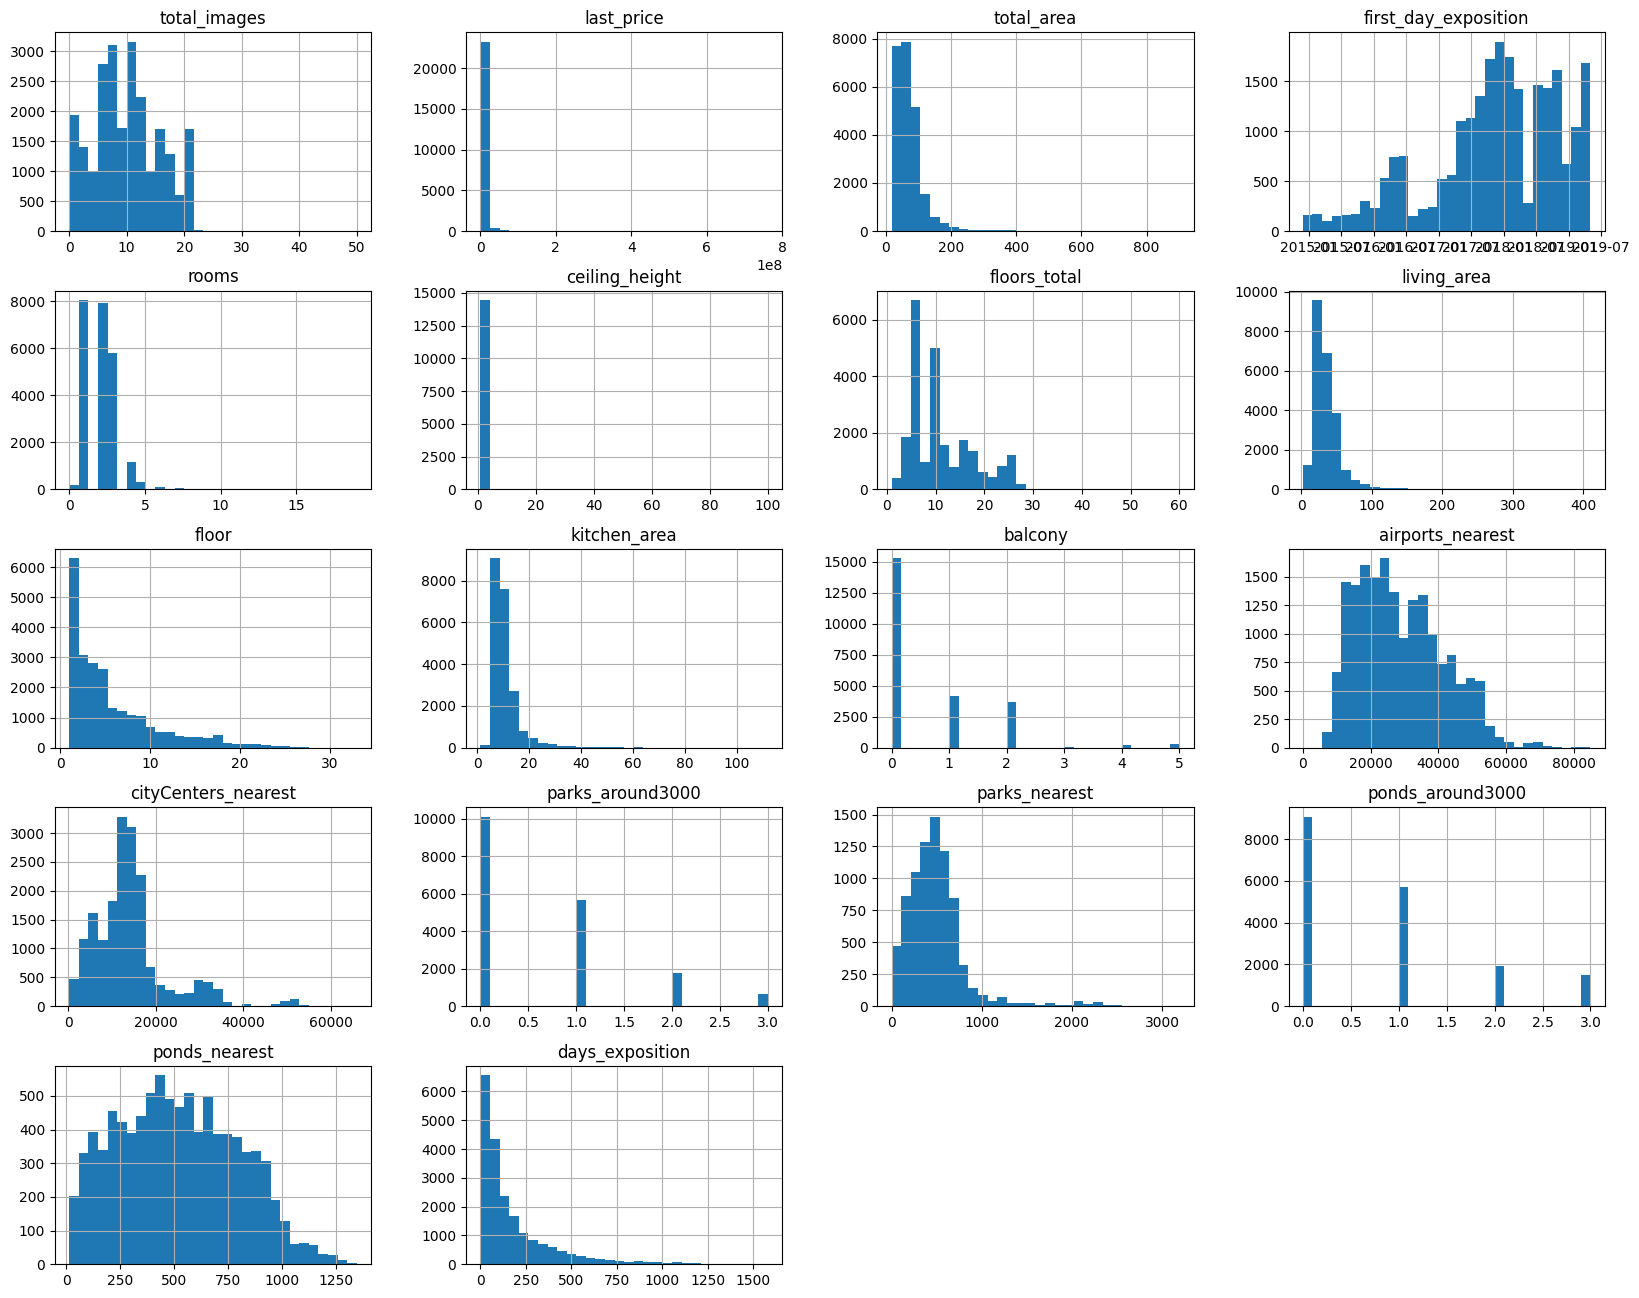

In [21]:
data.hist(figsize=(20,16), bins=30);

С `total_images` на первый взгляд всё в порядке, как и с `first_day_exposition`, `living_area`, `floor` и со всеми, следующими за ними. Но интересно посмотреть на `last_price`, `total_area`, `rooms`, `ceiling_height` и `floors_total`.

Есть длинный и низкий хвост в столбце `last_price`, проверим его, выведя на экран объявления с высокой стоимостью квадратного метра, так как сама по себе стоимость квартиры не показательна, а только по отношению к определённым параметрам (каким именно нам предстоит выяснить, но для предварительного анализа этого достаточно). Заодно и добавим новый столбец со стоимостью квадратного метра.

In [22]:
data['square_meter_cost'] = data['last_price'] / data['total_area']
display(data[data['square_meter_cost'] > 500_000].sort_values(by='last_price', ascending=False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name2,square_meter_cost
12971,19,763000000.0,525,2017-09-30,7,NaN,10,250,10,NaN,...,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург,1.453333e+06
14706,15,401300000.0,401,2016-02-20,5,NaN,9,204,9,False,...,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург,1.000748e+06
1436,19,330000000.0,190,2018-04-04,3,3.50,7,95,5,NaN,...,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Санкт-Петербург,1.736842e+06
22831,18,289238400.0,188,2019-03-19,2,3.37,6,64,6,NaN,...,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,Санкт-Петербург,1.538502e+06
16461,17,245000000.0,384,2017-04-10,6,3.35,7,183,4,NaN,...,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,Санкт-Петербург,6.380208e+05
13749,7,240000000.0,410,2017-04-01,6,3.40,7,218,7,NaN,...,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0,Санкт-Петербург,5.853659e+05
8900,13,190870000.0,268,2016-03-25,3,NaN,8,132,7,NaN,...,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0,Санкт-Петербург,7.122015e+05
19155,20,160000000.0,305,2018-11-12,5,NaN,5,145,4,NaN,...,Санкт-Петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0,Санкт-Петербург,5.245902e+05
2536,16,159984000.0,242,2015-08-27,4,3.85,9,131,7,NaN,...,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0,Санкт-Петербург,6.610909e+05
12674,16,140000000.0,241,2015-07-24,5,3.00,5,92,4,NaN,...,Санкт-Петербург,23512.0,3503.0,3.0,413.0,3.0,83.0,399.0,Санкт-Петербург,5.809129e+05


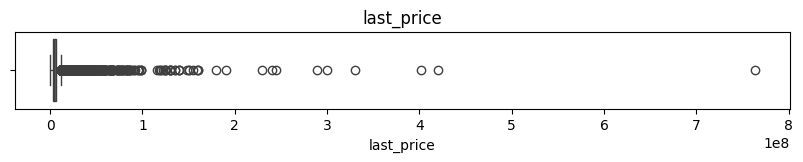

In [23]:
plt.figure(figsize=(10, 1))
ax = sns.boxplot(x=data['last_price'])
ax.set_title('last_price');

В общем-то все эти объекты либо действительно большие, либо расположены близко к центру, можно предположить, что они и вправду столько стоят. Однако такие значения выбиваются из всего объёма объявлений и являются "выбросами", что может повлиять на исследование. Поэтому их стоит убрать.

In [24]:
data = data.query("last_price < 50_000_000")

Посмотрим на распределение в `rooms`.

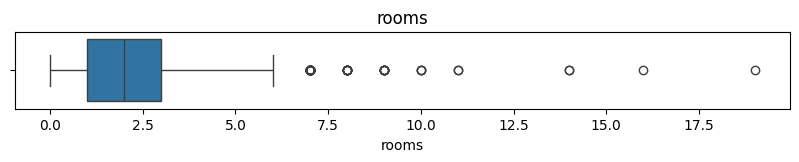

In [25]:
plt.figure(figsize=(10, 1))
ax = sns.boxplot(x=data['rooms'])
ax.set_title('rooms');

Удалим несколько квартир, количество комнат в которых аномально (для нашего датасета) велико.

In [26]:
data = data.query("rooms < 11")

Переходим к `total_area`.

In [27]:
display(data[data['total_area'] > 300].sort_values(by='total_area', ascending=False).head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name2,square_meter_cost
660,3,49950000.0,657,2017-10-04,7,3.20,6,312,4,NaN,...,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,Санкт-Петербург,76027.397260
20273,12,20000000.0,588,2019-03-20,6,3.10,3,280,1,NaN,...,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0,Санкт-Петербург,34013.605442
15607,5,34000000.0,522,2017-09-12,7,3.55,7,248,5,NaN,...,Санкт-Петербург,24363.0,4931.0,3.0,173.0,0.0,NaN,20.0,Санкт-Петербург,65134.099617
20314,8,42000000.0,503,2017-04-09,7,NaN,4,239,3,NaN,...,Пушкин,15595.0,27749.0,3.0,62.0,3.0,274.0,9.0,Пушкин,83499.005964
9826,1,43185328.0,494,2017-05-12,1,2.85,12,18,3,NaN,...,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0,Санкт-Петербург,87419.692308
2580,6,30900000.0,483,2017-10-16,7,3.86,6,230,4,NaN,...,Санкт-Петербург,24957.0,5641.0,0.0,NaN,0.0,NaN,406.0,Санкт-Петербург,63975.155280
16915,14,29000000.0,475,2017-01-12,9,3.35,5,226,4,NaN,...,Санкт-Петербург,24892.0,5162.0,2.0,263.0,0.0,NaN,825.0,Санкт-Петербург,61052.631579
6221,8,34000000.0,470,2018-01-14,4,NaN,3,249,3,NaN,...,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0,Санкт-Петербург,72340.425532
21685,7,22160000.0,443,2017-08-19,7,3.80,6,211,3,NaN,...,Санкт-Петербург,25761.0,5671.0,2.0,375.0,1.0,479.0,22.0,Санкт-Петербург,50022.573363
3676,12,28789000.0,442,2019-01-23,4,NaN,6,64,6,NaN,...,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,65133.484163


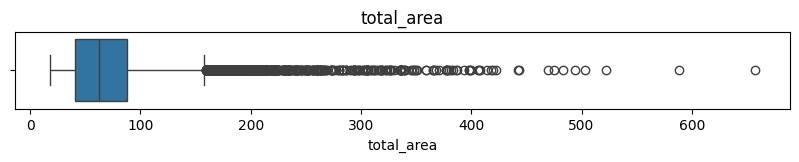

In [28]:
plt.figure(figsize=(10, 1))
ax = sns.boxplot(x=data['total_area'])
ax.set_title('total_area');

Похоже на правду, объекты не просто большие, но и дорогие. Но ситуция такая же, как и с ценой, и с комнатами, пара десятков объявлений может смазать исследование на двадцать тысяч, поэтмоу удалим их.

In [29]:
data = data.query("total_area < 300")

Далее обратим внимание на столбец `ceiling_height`, так же выведем испорченные данные, построим `boxplot` для определения масштабов бедствия, и внесём корректировки.

In [30]:
index_ceiling_high_height = data[data['ceiling_height'] > 5].index

display(data[data
        .index
        .isin(index_ceiling_high_height)]
        .sort_values(by='ceiling_height')
        .head(10))

display(data[data
        .index
        .isin(index_ceiling_high_height)]
        .sort_values(by='ceiling_height')
        .tail(1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name2,square_meter_cost
12628,14,3900000.0,50,2018-03-29,1,5.3,5,18,5,NaN,...,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,Санкт-Петербург,78000.000000
7578,17,38000000.0,174,2017-11-02,3,5.5,5,83,5,NaN,...,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,Санкт-Петербург,218390.804598
21227,0,8200000.0,143,2017-07-21,0,5.8,5,68,5,NaN,...,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,Санкт-Петербург,57342.657343
3474,3,1400000.0,30,2018-03-16,1,8.0,5,15,2,False,...,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,Нурма,46666.666667
17442,0,5350000.0,54,2015-06-16,2,8.0,5,29,2,NaN,...,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0,Красное Село,99074.074074
15743,14,5600000.0,86,2016-11-11,3,8.0,16,41,1,NaN,...,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0,Санкт-Петербург,65116.279070
5863,20,5650000.0,45,2018-08-15,1,8.3,16,19,14,NaN,...,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,Санкт-Петербург,125555.555556
22309,20,5300000.0,45,2017-09-30,1,10.3,16,16,15,NaN,...,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,Санкт-Петербург,117777.777778
15061,19,5600000.0,68,2018-05-11,2,14.0,14,32,5,NaN,...,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,Санкт-Петербург,82352.941176
17496,15,6700000.0,112,2019-02-19,3,20.0,17,53,14,NaN,...,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN,Санкт-Петербург,59821.428571


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name2,square_meter_cost
22869,0,15000000.0,25,2018-07-25,1,100.0,5,14,5,True,...,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,Санкт-Петербург,600000.0


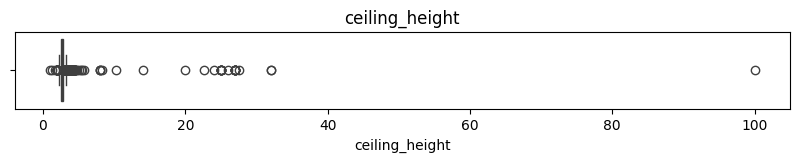

In [31]:
plt.figure(figsize=(10, 1))
ax = sns.boxplot(x=data['ceiling_height'])

ax.set_title('ceiling_height');

Потолки в 5.3, 8.3, 10.3 и 14 метров в 16 и 14 этажных зданиях выглядят неправдоподобно, поэтому заменим их на медиану. Так же заменим на медиану потолки ниже 2 метров, 20 - 22.6 метровые потолки и потолок в сто метров. 

In [32]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 5), 'ceiling_height'] = data['ceiling_height'].median()

Рассмотрим столбец `floors_total`.

In [33]:
display(data[data['floors_total'] > 30].sort_values(by='floors_total', ascending=False).head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name2,square_meter_cost
2253,12,3800000.0,58,2018-06-28,2,2.88,60,27,4,NaN,...,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт,65517.241379
16731,9,3978000.0,40,2018-09-24,1,2.65,52,10,18,NaN,...,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Санкт-Петербург,99450.000000
16934,5,4100000.0,40,2017-10-17,1,2.65,37,17,5,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург,102500.000000
397,15,5990000.0,54,2018-03-22,2,NaN,36,21,28,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,Санкт-Петербург,110925.925926
5807,17,8150000.0,80,2019-01-09,2,2.65,36,41,13,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Санкт-Петербург,101875.000000
11079,16,9200000.0,75,2019-02-22,2,2.70,36,40,29,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,Санкт-Петербург,122666.666667
2966,9,4300000.0,37,2017-08-08,1,NaN,35,14,15,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,Санкт-Петербург,116216.216216
4855,12,5500000.0,50,2017-06-22,1,2.80,35,22,4,NaN,...,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0,Санкт-Петербург,110000.000000
21809,20,10600000.0,77,2019-04-16,2,NaN,35,39,11,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,Санкт-Петербург,137662.337662
21599,12,6200000.0,51,2017-08-27,2,NaN,35,27,13,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,Санкт-Петербург,121568.627451


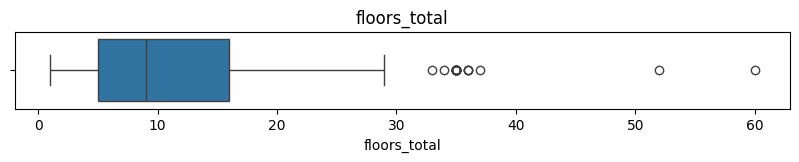

In [34]:
plt.figure(figsize=(10, 1))
ax = sns.boxplot(x=data['floors_total'])
ax.set_title('floors_total');

Два значения выбиваются - 52 и 60 этажные здания. В Кронштадте такого точно нет, в СПб самые высокие здания по 42 и 87 этажей, и что-то мне подсказывает, что цена за квадратный метр в них намного больше 100 тысяч рублей. Вместе с хвостом их 30+ этажных зданий заменим медианой и обновим инедксы.

In [35]:
data.loc[data['floors_total'] > 30, 'floors_total'] = data['ceiling_height'].median()
print(len(data))

23461


Теперь все красиво. Про остальные столбцы сложно что-то сказать, значения в них вполне укладываются в рамки разумного. Поэтому считаю, что данный раздел завершён, переходим к следующему, предварительно снова выведя гистограммы всех столбцов для проверки выполненной работы:

На столько строк полегчала таблица: 238
Что составялет: 1.01% от всего датафрейма


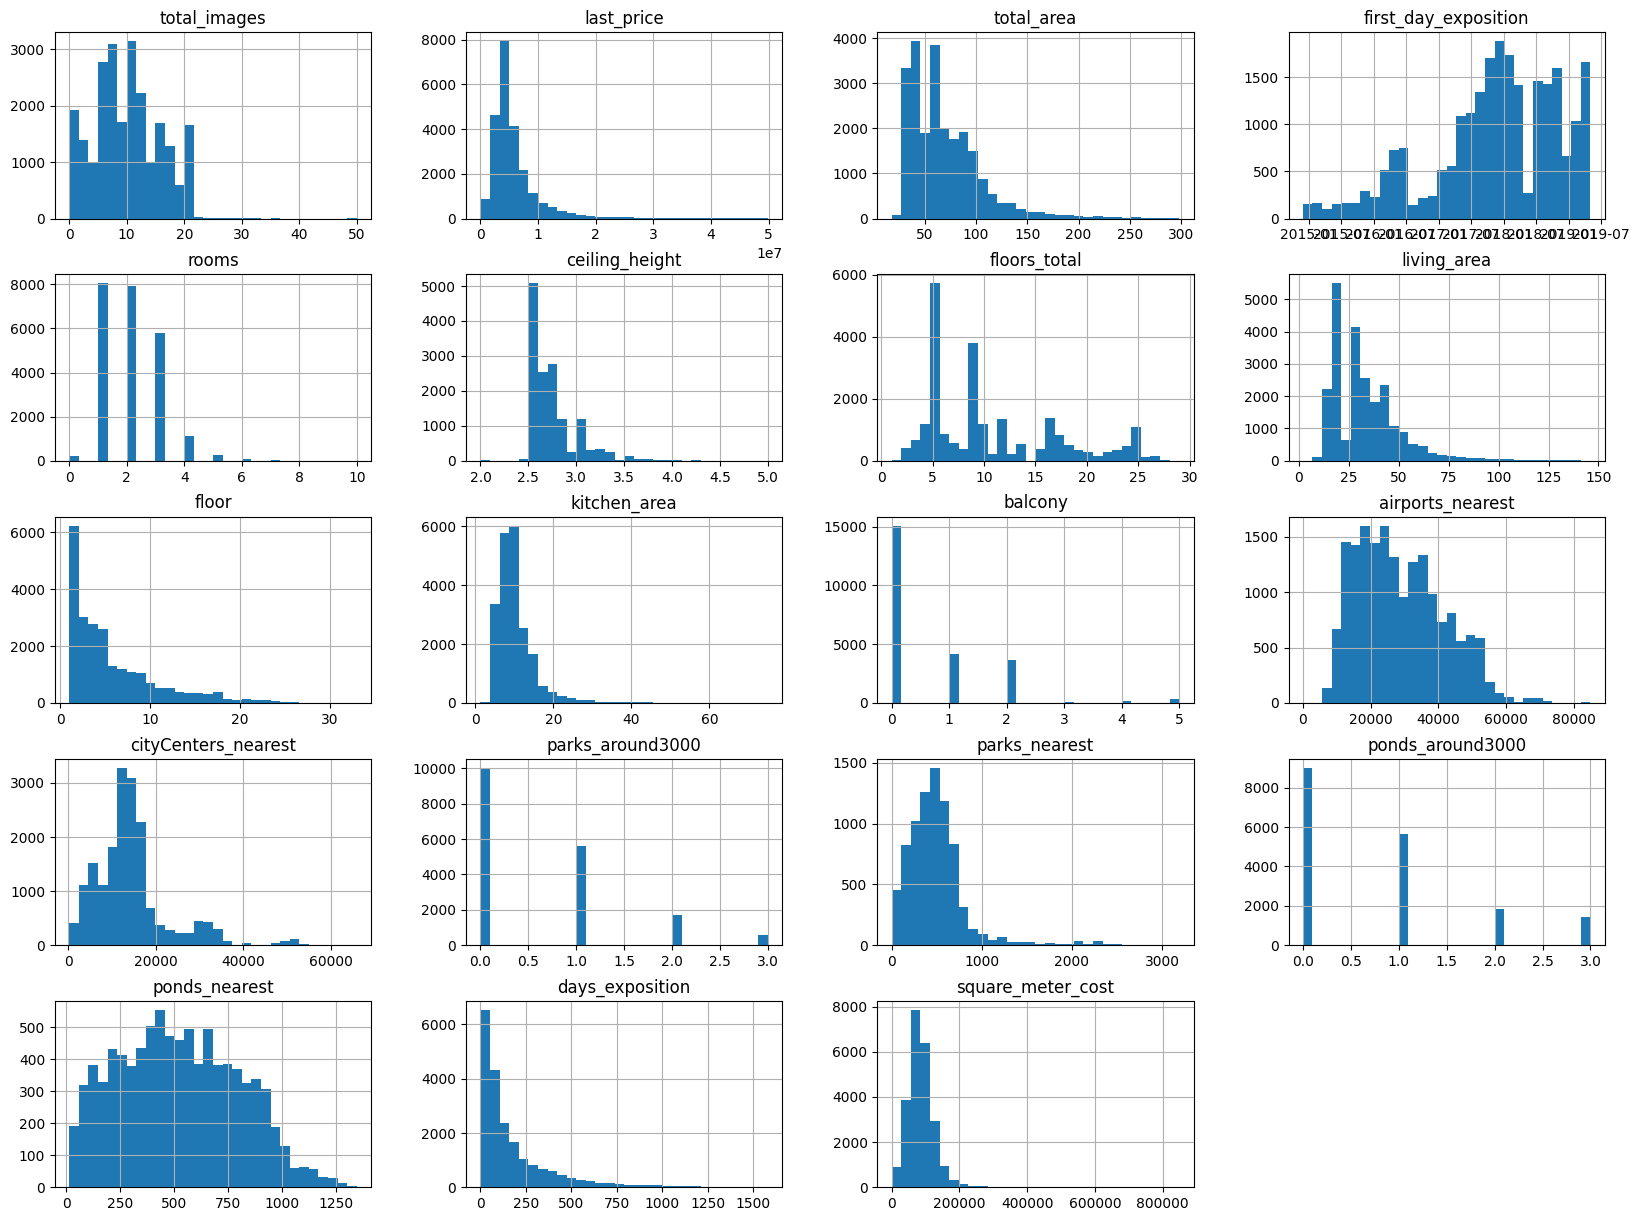

In [36]:
print('На столько строк полегчала таблица:', 23699 - len(data))
print('Что составялет: {:.2%} от всего датафрейма'
      .format((23699 - len(data))/len(data)))
data.hist(figsize=(20,15), bins=30);

### Вывод

В ходе предобработки данных там, где это было возможно, пропущенные значения заменены на медианные, исправлены аномальные значения, столбцы приведены к удобным типам данных, исключены неявные дубликаты. В целом добавленные пользователями данные потребовали минимальных корректировок, в то время как картографические данные имеют слишком много пропусков для искусственного их дозаполнения. Тем не менее датафрейм предобработан и готов к проведению рассчётов.

## Создание новых признаков

**Добавление столбца с ценой квадратного метра**

Данную операцию мы проделали ранее, поэтому сразу приступим к следующему шагу

**Добавление столбца с днем публикации объявления**

In [37]:
data['day_of_exposition'] = data['first_day_exposition'].dt.weekday
print(data[['day_of_exposition', 'first_day_exposition']].head(5))

   day_of_exposition first_day_exposition
0                  3           2019-03-07
1                  1           2018-12-04
2                  3           2015-08-20
4                  1           2018-06-19
5                  0           2018-09-10


7 марта 2019 года это действительно четверг (3), а 4 декабря 2018 - вторник (2)

**Добавление столбца с месяцем публикации объявления**

In [38]:
data['month_of_exposition'] = data['first_day_exposition'].dt.strftime("%m").astype(int)
print(data[['month_of_exposition', 'first_day_exposition']].head(5))

   month_of_exposition first_day_exposition
0                    3           2019-03-07
1                   12           2018-12-04
2                    8           2015-08-20
4                    6           2018-06-19
5                    9           2018-09-10


**Добавление столбца с годом публикации объявления**

In [39]:
data['year_of_exposition'] = data['first_day_exposition'].dt.strftime("%Y").astype(int)
print(data[['year_of_exposition', 'first_day_exposition']].head(5))

   year_of_exposition first_day_exposition
0                2019           2019-03-07
1                2018           2018-12-04
2                2015           2015-08-20
4                2018           2018-06-19
5                2018           2018-09-10


**Добалвение столбца с типом этажа квартиры**

In [40]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']), 'floor_type'] = 'другой'

print(data[['floor', 'floors_total', 'floor_type']].head(5))
print(data[data['floor_type'] == 'последний'][['floor', 'floors_total', 'floor_type']].head(5))

   floor  floors_total floor_type
0      8          16.0     другой
1      1          11.0     первый
2      4           5.0     другой
4     13          14.0     другой
5      5          12.0     другой
    floor  floors_total floor_type
12      5           5.0  последний
13      5           5.0  последний
23      9           9.0  последний
36      9           9.0  последний
43      4           4.0  последний


**Добавление столбца с расстоянием в километрах до центра**

In [41]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)
print(data[['cityCenters_nearest_km', 'cityCenters_nearest']].head(5))

   cityCenters_nearest_km  cityCenters_nearest
0                    16.0              16028.0
1                    19.0              18603.0
2                    14.0              13933.0
4                     8.0               8098.0
5                     NaN                  NaN


Новые столбцы добавлены и проверены на правильность внесения новых значений. Проверим типы данных и скорректируем их при необходимости.

In [42]:
to_replace = ['floors_total', 'square_meter_cost']

for column in to_replace:
    print(column)
    data[column] = data[column].round(0).astype(int, errors='ignore')

data.info()

floors_total
square_meter_cost
<class 'pandas.core.frame.DataFrame'>
Index: 23461 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23461 non-null  int16         
 1   last_price              23461 non-null  float64       
 2   total_area              23461 non-null  int16         
 3   first_day_exposition    23461 non-null  datetime64[ns]
 4   rooms                   23461 non-null  int16         
 5   ceiling_height          14348 non-null  float64       
 6   floors_total            23461 non-null  int32         
 7   living_area             23461 non-null  int16         
 8   floor                   23461 non-null  int16         
 9   is_apartment            2748 non-null   object        
 10  studio                  23461 non-null  bool          
 11  open_plan               23461 non-null  bool          
 12  kitchen_area        

### Вывод

В датафрейм добавлены новые функциональные столбцы, которые позволят провести анализ факторов, влияющих на стоимость квартиры. Приступаем к исследовательскому анализу данных.

## Исследовательский анализ данных

**Общая площадь**

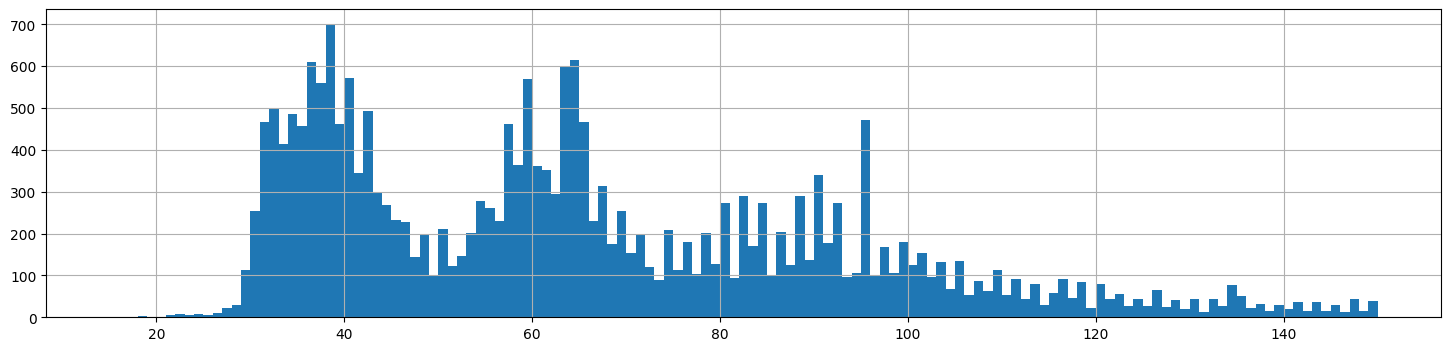

In [43]:
data['total_area'].hist(bins=135, figsize=(18,4), range=(15, 150));

Интересные пики около 40, 60 и 95 квадратных метров. Возможно они связаны с количеством комнат, проверим

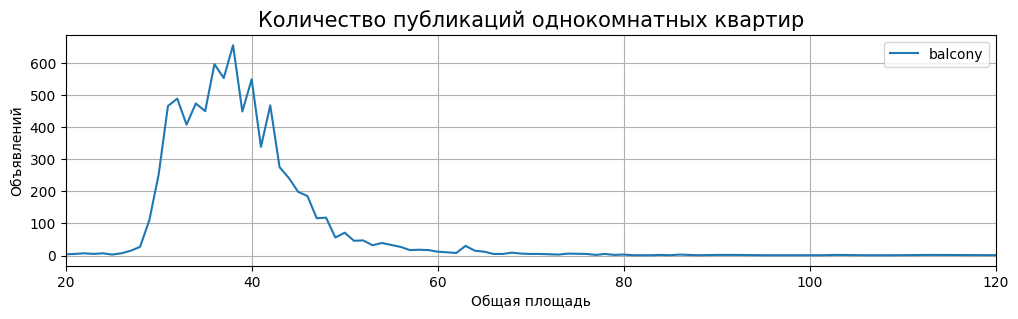

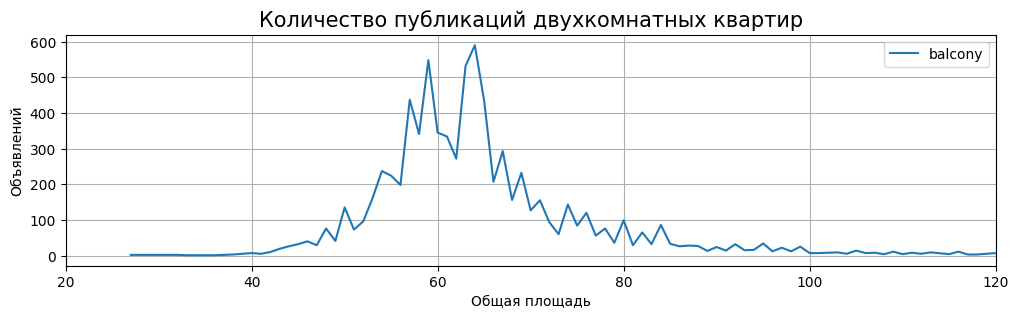

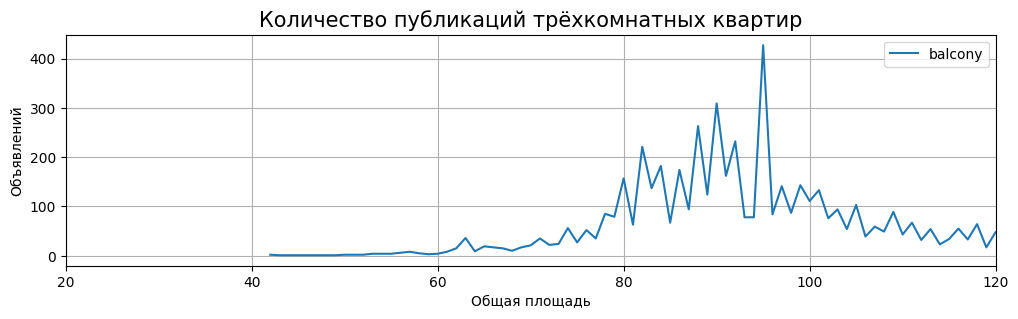

In [44]:
(
    data.query('rooms==1')
    .pivot_table(index='total_area', values='balcony', aggfunc='count')
    .plot(grid=True, figsize=(12, 3), xlim=(20,120))
);
plt.ylabel('Объявлений')
plt.xlabel('Общая площадь')
plt.title('Количество публикаций однокомнатных квартир', fontsize=15);

(    
    data.query('rooms==2')
    .pivot_table(index='total_area', values='balcony', aggfunc='count')
    .plot(grid=True, figsize=(12, 3), xlim=(20,120))
);
plt.ylabel('Объявлений')
plt.xlabel('Общая площадь')
plt.title('Количество публикаций двухкомнатных квартир', fontsize=15);

(    
    data.query('rooms==3')
    .pivot_table(index='total_area', values='balcony', aggfunc='count')
    .plot(grid=True, figsize=(12, 3), xlim=(20,120))
);
plt.ylabel('Объявлений')
plt.xlabel('Общая площадь')
plt.title('Количество публикаций трёхкомнатных квартир', fontsize=15);

Так и есть: 1-комнатные квартиры скорее всего будут иметь площадь 38 квадратных метров, 2-комнатные 60, а 3-комнатные около 90-95.

Так и есть, очень много однокомнатных квартир с площадью 18 квадратных метров, двухкомнатных с площью 30 квадратных метров и трёхкомнатных по 45 квардратных метров. Будто кухня считается за комнату.

**Площадь кухни**

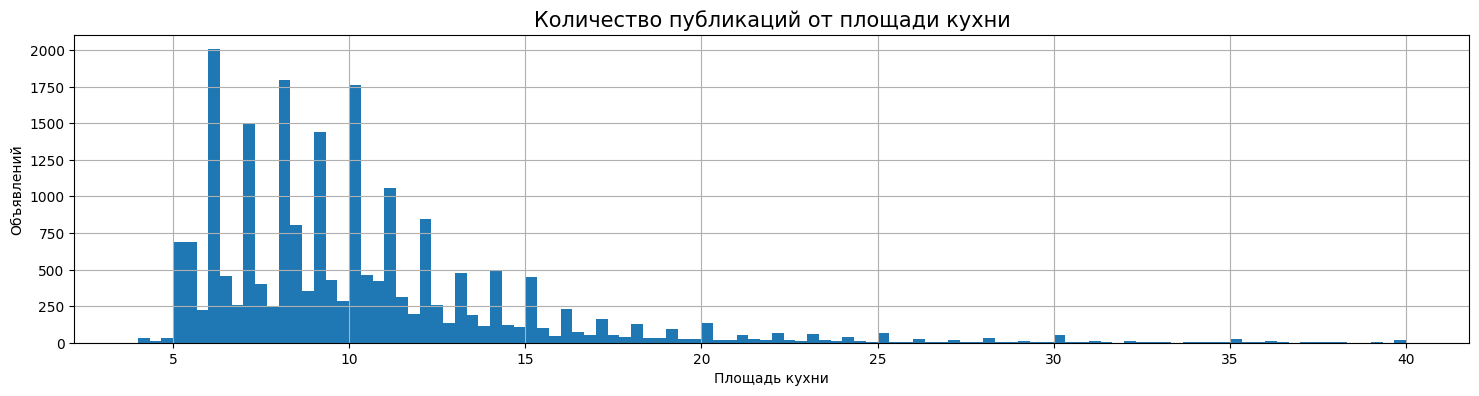

In [45]:
data['kitchen_area'].hist(bins=108, figsize=(18,4), range=(4, 40));
plt.ylabel('Объявлений')
plt.xlabel('Площадь кухни')
plt.title('Количество публикаций от площади кухни', fontsize=15);

Кухни, чаще всего бывают небольшими, от 6 до 10 квадратных метров, при этом при формировании объявления стараются использовать целые числа.

**Цена объекта**

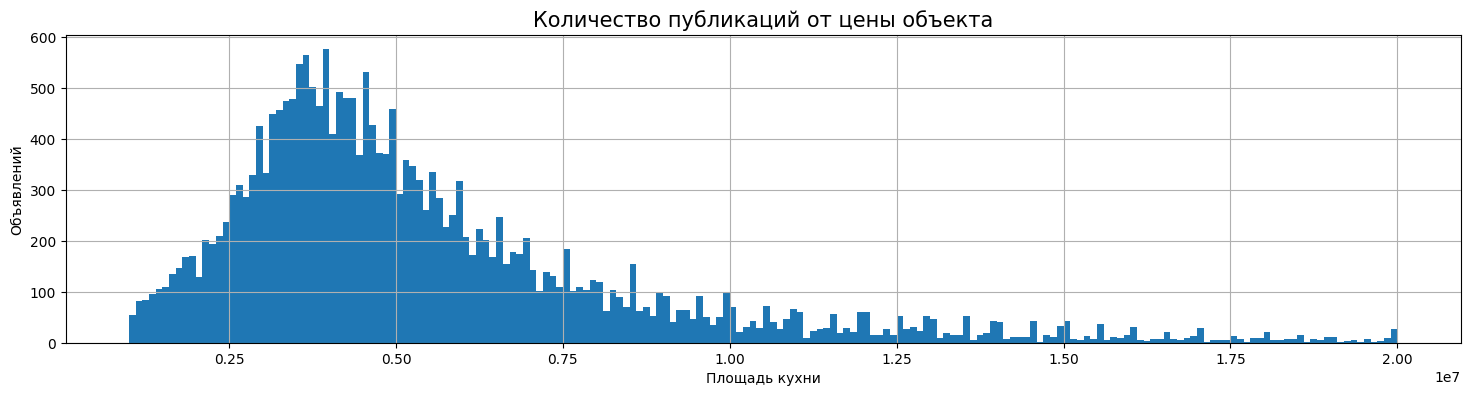

In [46]:
data['last_price'].hist(bins=190, figsize=(18,4), range=(1_000_000, 20_000_000));
plt.ylabel('Объявлений')
plt.xlabel('Площадь кухни')
plt.title('Количество публикаций от цены объекта', fontsize=15);

Распределение Пуассона, самая популярная цена - от 3 до 4 миллионов, так же наблюдается тяга к круглым числам в виде периодических пиков.

**Количество комнат**

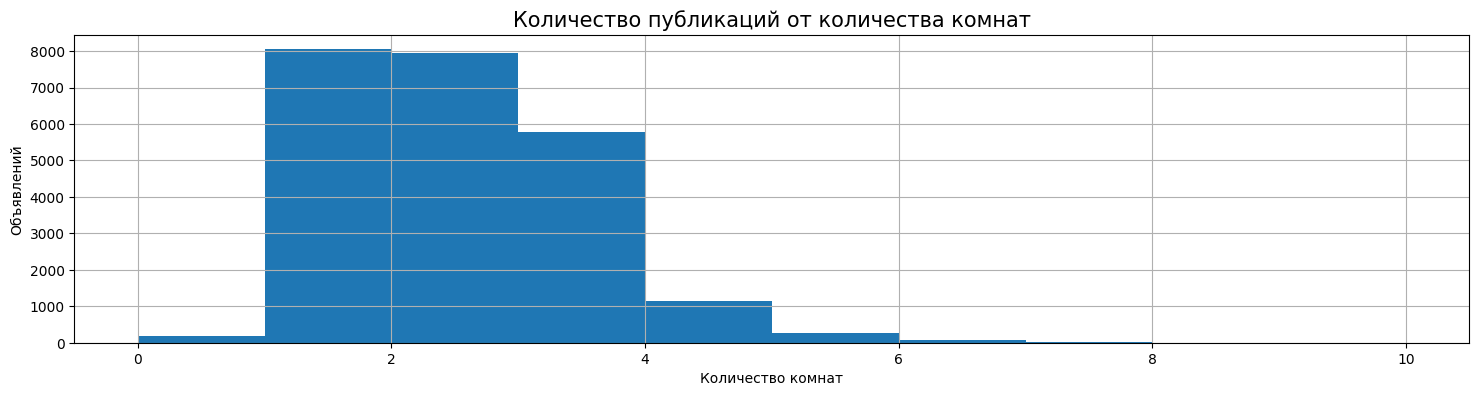

In [47]:
data['rooms'].hist(bins=10, figsize=(18,4), range=(0,10));
plt.ylabel('Объявлений')
plt.xlabel('Количество комнат')
plt.title('Количество публикаций от количества комнат', fontsize=15);

Самые популярные квартиры - 1, 2 и 3 комнатные.

**Высота потолков**

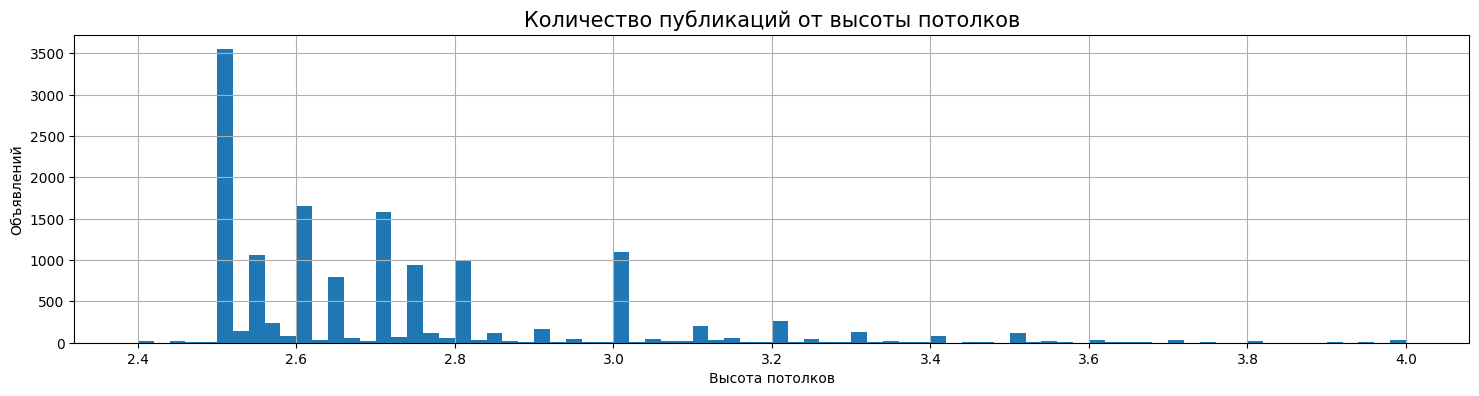

In [48]:
data['ceiling_height'].hist(bins=80, figsize=(18,4), range=(2.4, 4));
plt.ylabel('Объявлений')
plt.xlabel('Высота потолков')
plt.title('Количество публикаций от высоты потолков', fontsize=15);

2.5 метра - самая частовстречающаяся высота потолка.

**Этаж квартиры**

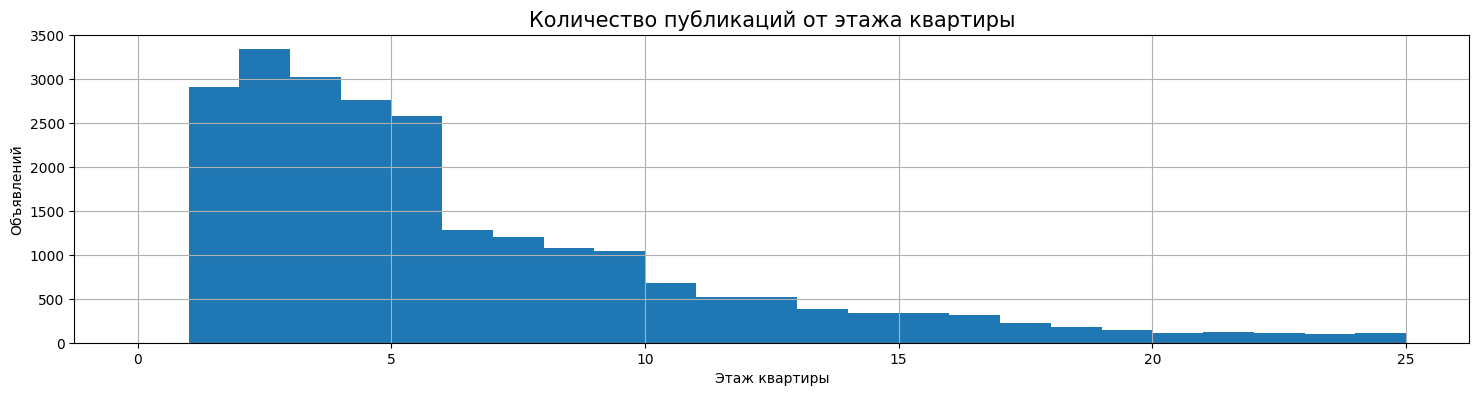

In [49]:
data['floor'].hist(bins=25, figsize=(18,4), range=(0,25));
plt.ylabel('Объявлений')
plt.xlabel('Этаж квартиры')
plt.title('Количество публикаций от этажа квартиры', fontsize=15);

Еще одно распределение Пуассона с пиком в значениях от 1 до 5.

**Тип этажа квартиры**

In [50]:
data['floor_type'].value_counts()

floor_type
другой       17249
последний     3333
первый        2879
Name: count, dtype: int64

Почти все объявления относятся к категории "другой".

**Общее количество этажей в доме**

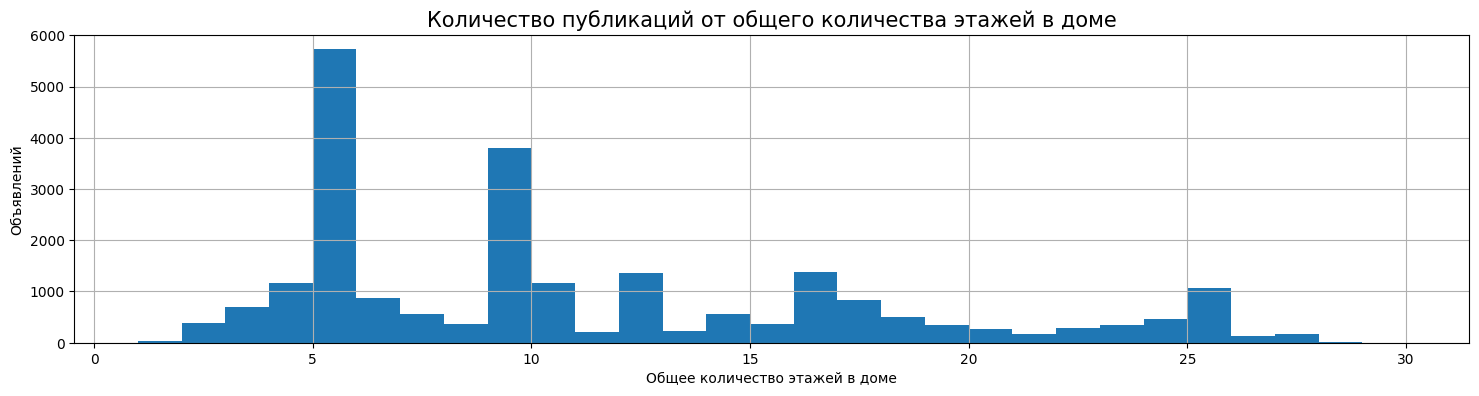

In [51]:
data['floors_total'].hist(bins=29, figsize=(18,4), range=(1,30));
plt.ylabel('Объявлений')
plt.xlabel('Общее количество этажей в доме')
plt.title('Количество публикаций от общего количества этажей в доме', fontsize=15);

5 и 10 этажные дома превалируют.

**Расстояние до центра города в метрах**

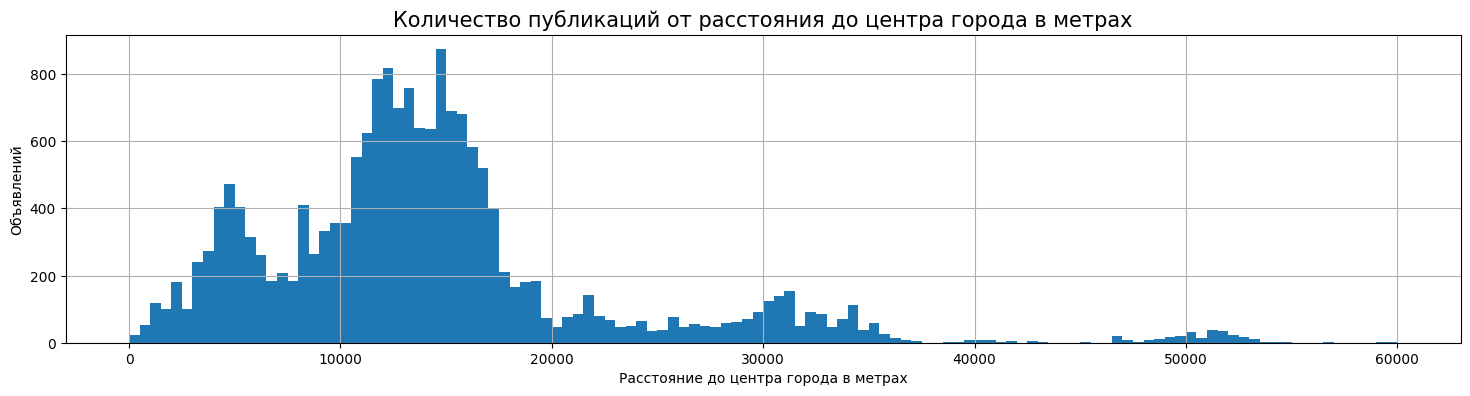

In [52]:
data['cityCenters_nearest'].hist(bins=120, figsize=(18,4), range=(0,60_000));
plt.ylabel('Объявлений')
plt.xlabel('Расстояние до центра города в метрах')
plt.title('Количество публикаций от расстояния до центра города в метрах', fontsize=15);

Пики от 11 до 16 километров - крайние станции метро, 30 километров - возможно, Сестрорецк, 50+ километров - Кронштадт, при этом довольно много недвижимости находится в пределах 5 километров от центра.

**Расстояние до ближайшего аэропорта в метрах**

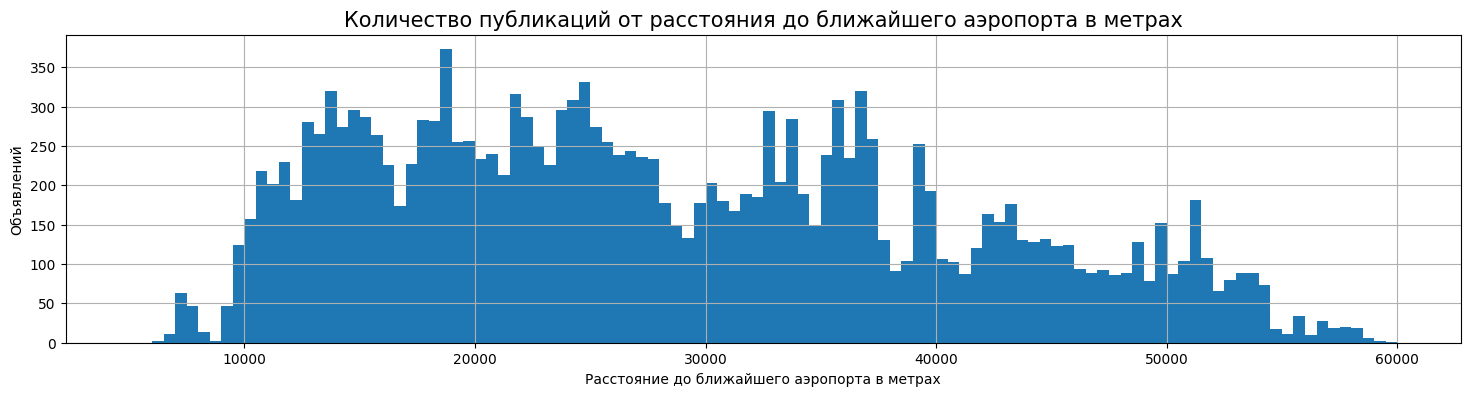

In [53]:
data['airports_nearest'].hist(bins=110, figsize=(18,4), range=(5_000,60_000));
plt.ylabel('Объявлений')
plt.xlabel('Расстояние до ближайшего аэропорта в метрах')
plt.title('Количество публикаций от расстояния до ближайшего аэропорта в метрах', fontsize=15);

В Санкт-Петербурге есть один аэропорт, находящийся на расстоянии примерно 15 километров от центра города, поэтому, согласно предыдущей гистограмме, основной объём жилья расположен в диапазоне 15 +- 11 = от 4 до 26 километров, что соответствует графику.

**Расстояние до ближайшего парка**

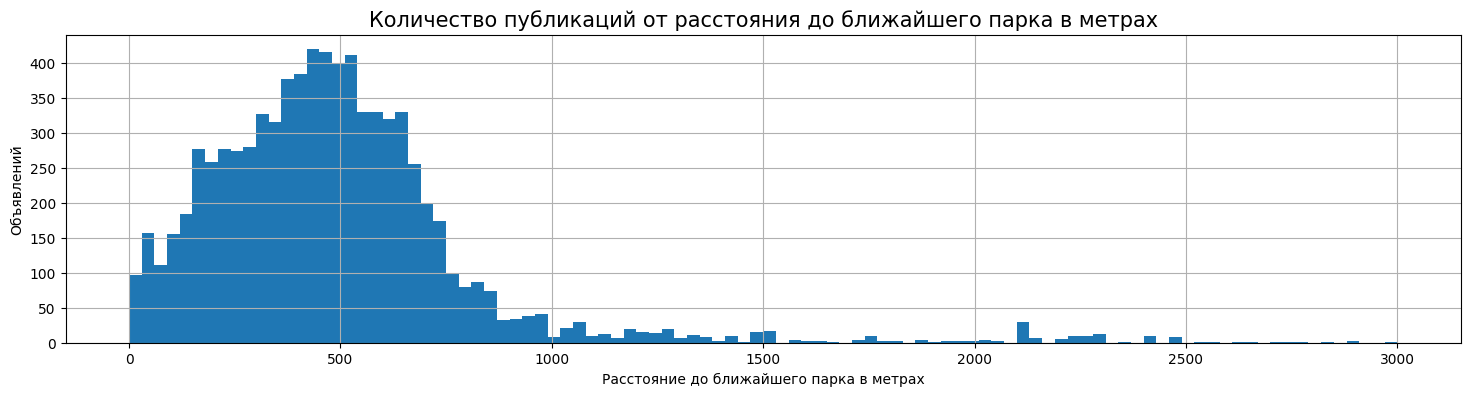

In [54]:
data['parks_nearest'].hist(bins=100, figsize=(18,4), range=(0,3_000));
plt.ylabel('Объявлений')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.title('Количество публикаций от расстояния до ближайшего парка в метрах', fontsize=15);

500 метров до парка в среднем - очень даже неплохо.

**День и месяц публикации объявления**

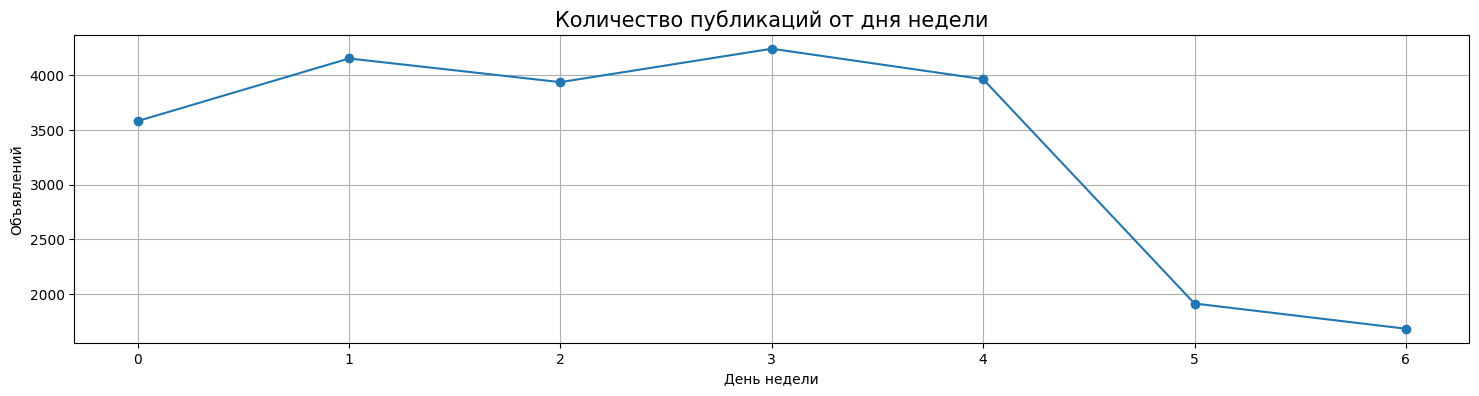

In [55]:
data['day_of_exposition'].value_counts().sort_index().plot(grid=True, style='o-', figsize=(18,4));
plt.ylabel('Объявлений')
plt.xlabel('День недели')
plt.title('Количество публикаций от дня недели', fontsize=15);

В выходные объявления публикуют в два раза реже, даже риелторам нужен отдых.

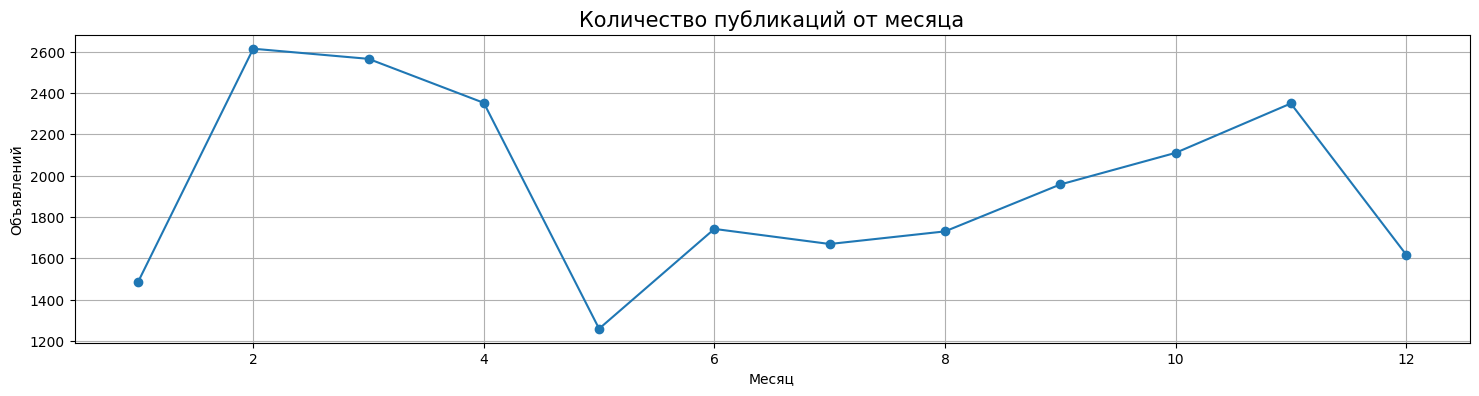

In [56]:
data['month_of_exposition'].value_counts().sort_index().plot(grid=True, style='o-', figsize=(18,4));
plt.ylabel('Объявлений')
plt.xlabel('Месяц')
plt.title('Количество публикаций от месяца', fontsize=15);

Новый год, майские праздники и летние отпуска сильно подрывают статистику публикаций объявлений в соответствующие месяцы.

**Изучение days_exposition**

Построим полную и сокращенную гистограммы, исследуем их, вызовем метод .describe().

count    20334.000000
mean       179.648962
std        218.539090
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Параметры пика  days_exposition
45.0    879
Name: total_images, dtype: int64


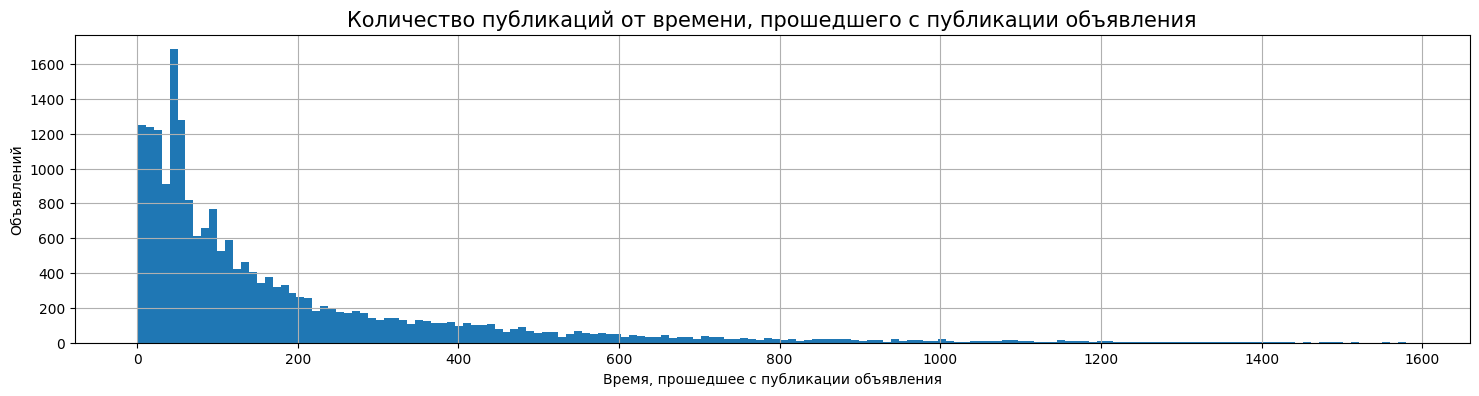

In [57]:
print(data['days_exposition'].describe())
print()

# Интересный пик, на какое значение он приходится?

data_grouped = data.groupby('days_exposition')['total_images'].count()
print('Параметры пика ', data_grouped[lambda x: x == data_grouped.max()])

data['days_exposition'].hist(bins=160, figsize=(18,4));
plt.ylabel('Объявлений')
plt.xlabel('Время, прошедшее с публикации объявления')
plt.title('Количество публикаций от времени, прошедшего с публикации объявления', fontsize=15);

Четверть всех квартир продаётся за полтора месяца. Довольно быстро. При этом продажа другой четверти занимает более полугода, доходя до пиковых значений в несколько лет. И на графике есть выброс в 878 продаж на 45 день. Интересно, с чем это может быть связано?

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Построим графики зависимости цены на квартиру от основных параметров. После этого рассчитаем корреляции.

**От `total_area`**

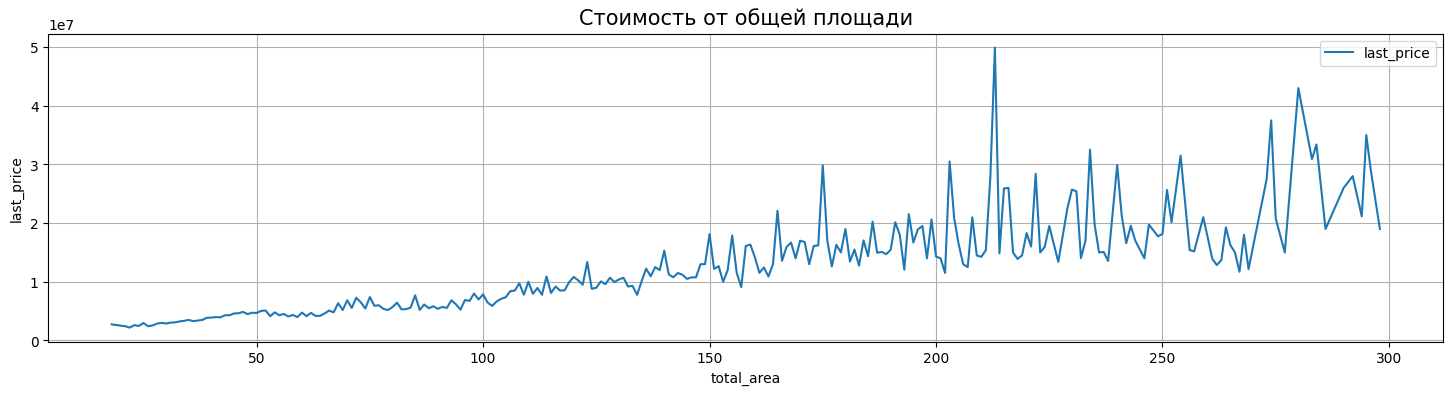

In [58]:
(
    data
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);
plt.ylabel('last_price')
plt.xlabel('total_area')
plt.title('Стоимость от общей площади', fontsize=15);

Очевиден тренд на повышение стоимости квартиры в замисимости от её площади.

**От `rooms`**

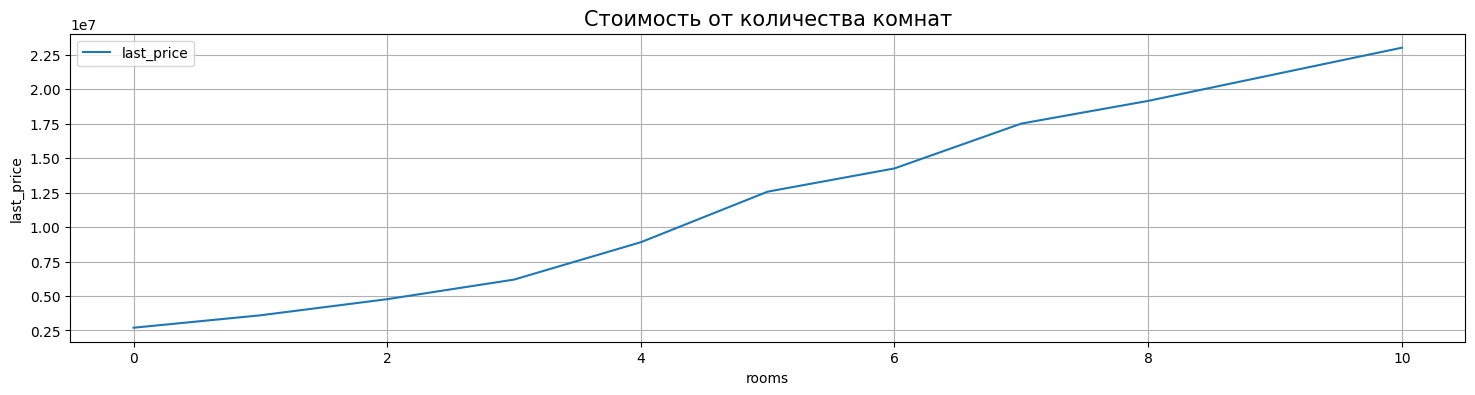

In [59]:
(
    data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);

plt.ylabel('last_price')
plt.xlabel('rooms')
plt.title('Стоимость от количества комнат', fontsize=15);

Так же очевиден тренд на повышение стоимости квартиры в замисимости от количества комнат. В общем то количество комнат и площадь квартиры напрямую связаны.

**От `floor_type`**

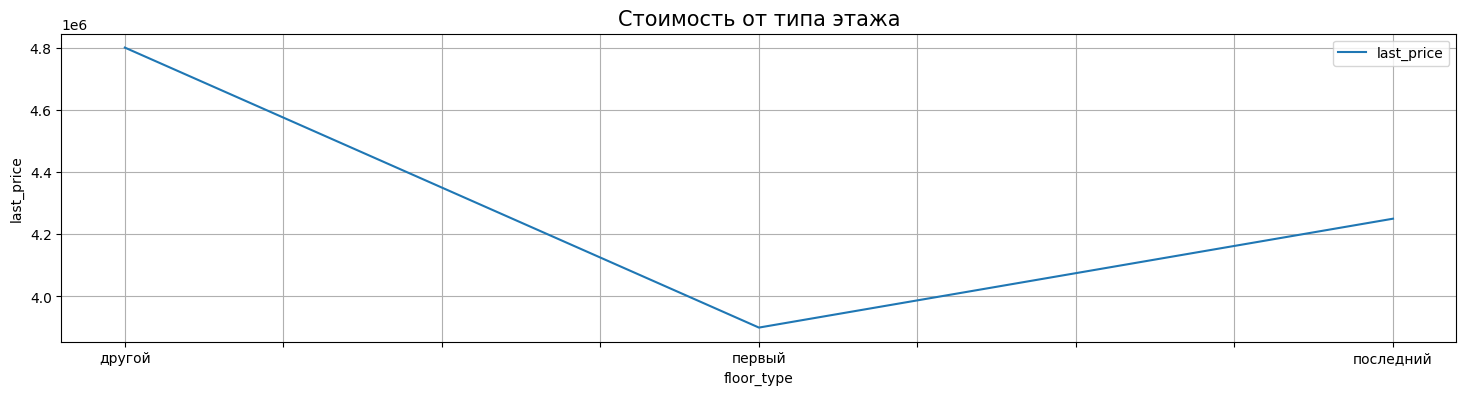

In [60]:
(
    data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);
plt.ylabel('last_price')
plt.xlabel('floor_type')
plt.title('Стоимость от типа этажа', fontsize=15);

Квартиры на первом этаже значительно дешевле. Последний этаж тоже заметно снижает цену квартиры.

**От `day_of_exposition`**

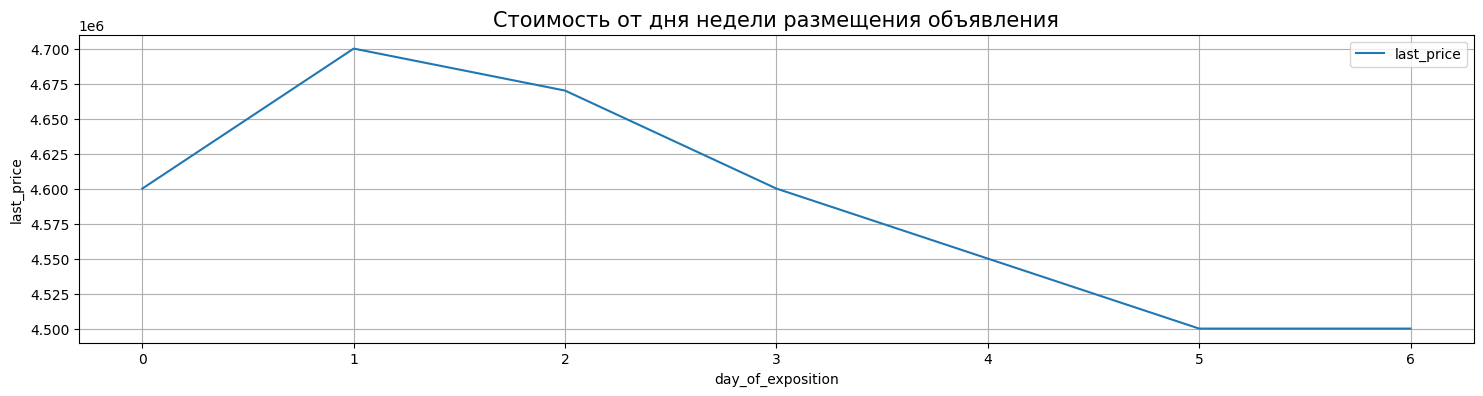

In [61]:
(
    data
    .pivot_table(index='day_of_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);

plt.ylabel('last_price')
plt.xlabel('day_of_exposition')
plt.title('Стоимость от дня недели размещения объявления', fontsize=15);

Интересно, что квартиры, объявление о продаже которых размещены в конце недели продаются дешевле. Либо же в эти дни размещаются объявления квартир, которые изначально стоят дешевле среднего. Хороший момент для будущих исследований.

**От `month_of_exposition`**

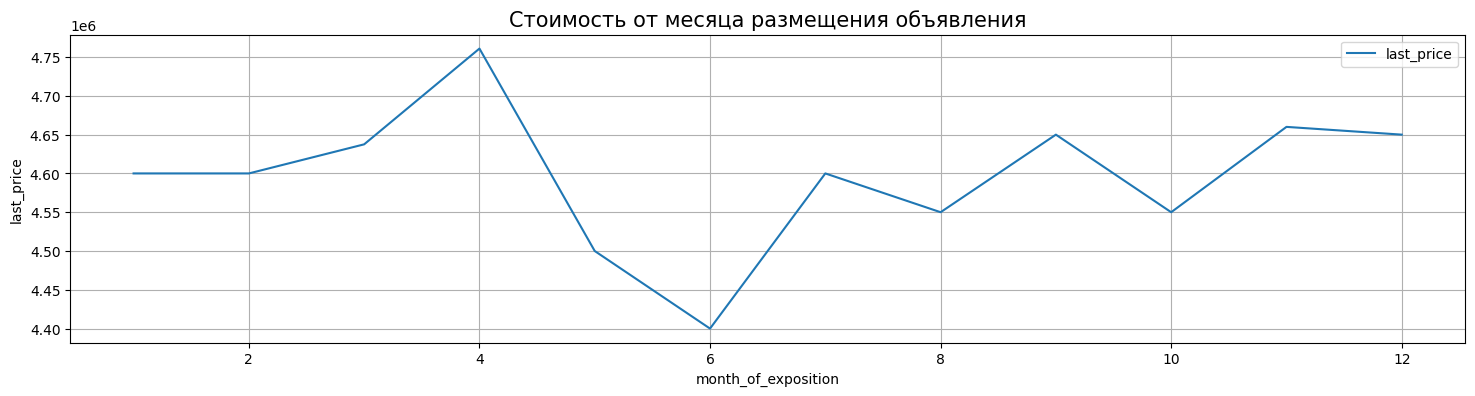

In [62]:
(
    data
    .pivot_table(index='month_of_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);

plt.ylabel('last_price')
plt.xlabel('month_of_exposition')
plt.title('Стоимость от месяца размещения объявления', fontsize=15);

Значительная просадка по цене квартир в июне, остальные месяцы плюс минус схожи.

**От `year_of_exposition`**

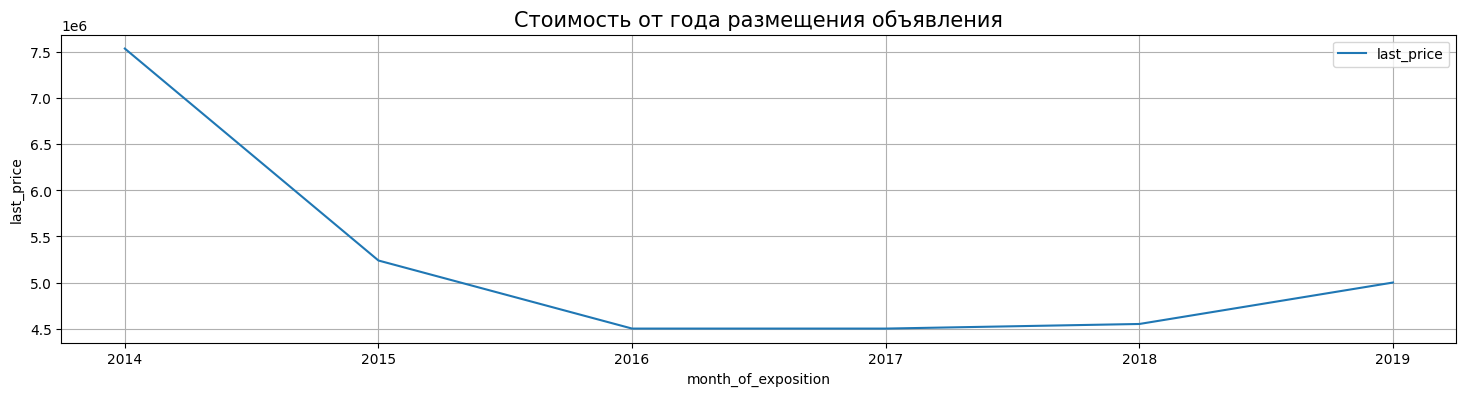

In [63]:
(
    data
    .pivot_table(index='year_of_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);

plt.ylabel('last_price')
plt.xlabel('month_of_exposition')
plt.title('Стоимость от года размещения объявления', fontsize=15);

С 2014 по 2016 средняя цена на квартиры резко снизалсь. Возможно это связано с появлением доступного и дешёвого жилья.

И построим `sns.pairplot` для отображения связи между `last_price`, `square_meter_cost`, `total_area` и `rooms`.

e:\progs\python395\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


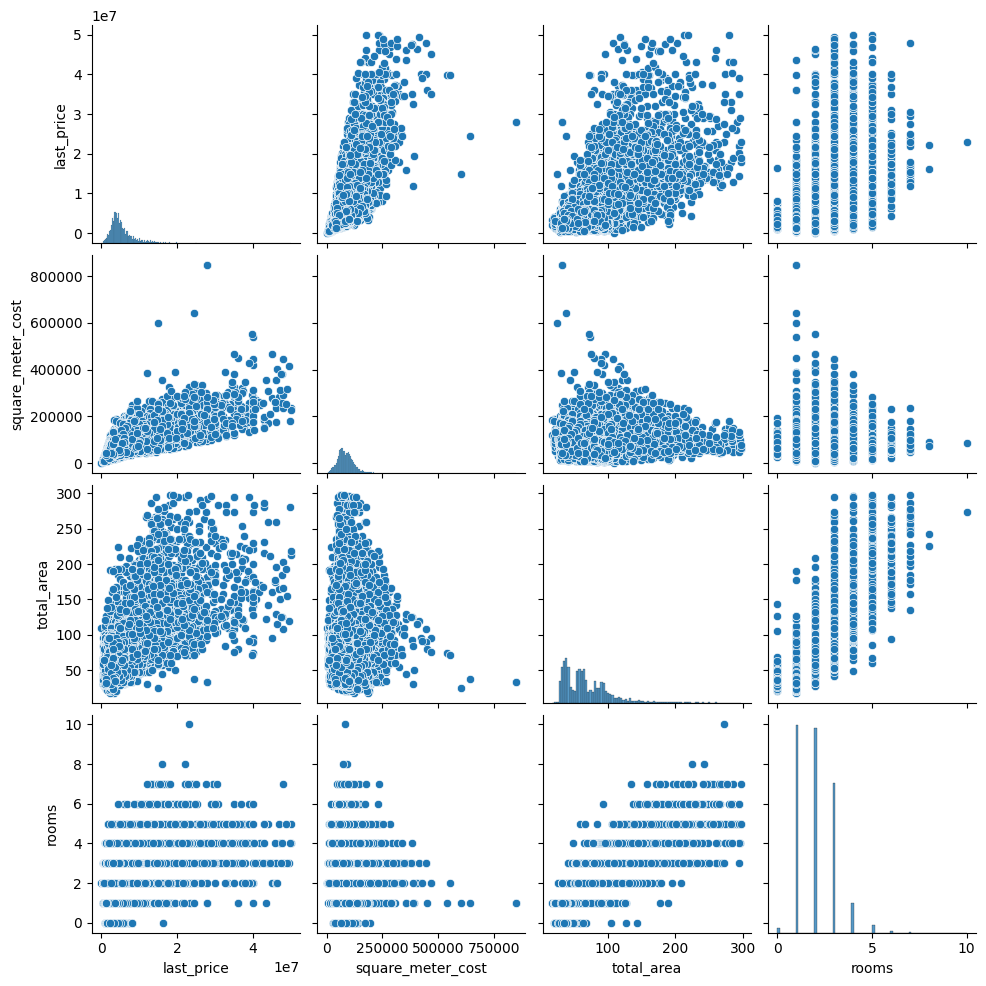

In [64]:
sns.pairplot(data[['last_price', 'square_meter_cost', 'total_area', 'rooms']]);

In [65]:
def correlation(a, second_column):
    for column in second_column:
        print('Корреляция между {0} и {1} равна: {2}'
          .format('last_price', column, a.corr(data[column])))
          
second_column = ['total_area', 'living_area','kitchen_area','rooms',
                 'day_of_exposition', 'month_of_exposition', 'year_of_exposition']

correlation(data['last_price'], second_column)    

Корреляция между last_price и total_area равна: 0.6690386551996043
Корреляция между last_price и living_area равна: 0.6411734499143882
Корреляция между last_price и kitchen_area равна: 0.5976485981657964
Корреляция между last_price и rooms равна: 0.47906607934315754
Корреляция между last_price и day_of_exposition равна: -0.01591155253102508
Корреляция между last_price и month_of_exposition равна: 0.0033164745025470012
Корреляция между last_price и year_of_exposition равна: -0.043473980472382816


Таким образом сильнее всего влияют на стоимость квартиры параметры, выраженные в квадратных метрах. Не так сильно влияет количество комнат (что, кстати, интересно), день, месяц и год размещения не влияют вовсе. Хотя на графике зависимости стоимости квартиры от года публикации объявления довольно неплохой разброс от 4.5 до 7 млн. Возможно из-за нелинейного характера зависимости метод .corr() выдаёт значение, близкое к нулю.

### Рассчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Особый интерес вызывает информация о самых дорогих населённых пунктах для проживания.

In [66]:
# Сгруппируем по locality_name2, посчитаем количество объявлений, отсортируем,
# возьмём верхнюю десятку и сохраним названия локаций.

top_locations = data.groupby('locality_name2')['total_images'].count().sort_values(ascending=False).head(10)
print(top_locations)
top_locations_name = top_locations.index

# Посчитаем среднюю цену квадратного метра и сопоставим с популярностью объявлений

avg_square_meter = (
    data
    .query('locality_name2 in @top_locations_name')
    .groupby('locality_name2')['square_meter_cost']
    .mean()
    .sort_values(ascending=False)
)

top_locations_final = pd.concat([top_locations, avg_square_meter], axis= 1)
top_locations_final.rename(columns = {'total_images' : 'count'}, inplace = True)

print(top_locations_final.sort_values(by='square_meter_cost', ascending=False).round(0))

locality_name2
Санкт-Петербург    15491
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               367
Колпино              337
Парголово            326
Гатчина              307
Выборг               237
Name: total_images, dtype: int64
                 count  square_meter_cost
locality_name2                           
Санкт-Петербург  15491            98956.0
Пушкин             367            91259.0
Кудрово            472            89641.0
Парголово          326            86460.0
Мурино             590            79788.0
Шушары             440            72240.0
Колпино            337            63386.0
Всеволожск         398            61820.0
Гатчина            307            58970.0
Выборг             237            48415.0


Самые дорогие квартиры, как и ожидалось, в Питере. А вот в Пушкине дороже, чем в Кудрово. Выборг же оказался самым дешевым городом для покупки жилья среди топ-10.

### Средняя цена километра до центра в Санкт-Петербурге

Очевидно, что чем дальше от центра города, тем в среднем дешевле жильё. Не очевидно, на сколько именно.

Стоимость километра до центра в Санкт-Петербурге = 608985


C:\Users\tushkaxx\AppData\Local\Temp\ipykernel_13340\709527783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPb['cityCenters_nearest_km'] = SPb['cityCenters_nearest_km'].fillna(SPb['cityCenters_nearest_km'].median())


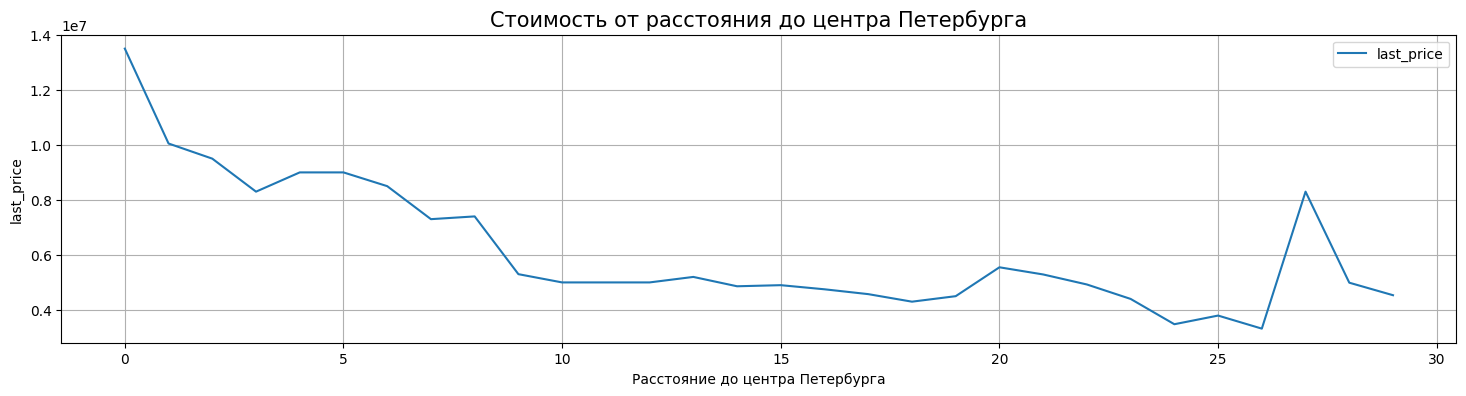

In [67]:
# Создадим отдельный датафрейм с объявлениями по Санкт-Петербургу и заполним
# при необходимости пропуски медианой.

SPb = data[data['locality_name2'] == 'Санкт-Петербург']
SPb['cityCenters_nearest_km'] = SPb['cityCenters_nearest_km'].fillna(SPb['cityCenters_nearest_km'].median())

# Рассчитаем стоимость километра

SPb_km_price = SPb['last_price'].sum() / SPb['cityCenters_nearest_km'].sum()
print('Стоимость километра до центра в Санкт-Петербурге =', int(SPb_km_price))

# Построим для наглядности график

(
    SPb
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18,4))
);
plt.ylabel('last_price')
plt.xlabel('Расстояние до центра Петербурга')
plt.title('Стоимость от расстояния до центра Петербурга', fontsize=15);

График резко идёт вниз, однако на расстоянии от 10 до 20 километров от центра цена квартир почти не изменяется. Видимо слишком разные районы представлены в этом диапазоне, они компенсируют друг друга. Интересный пик на расстоянии 27 километров. Посмотрим на него.

In [68]:
print(data[data['cityCenters_nearest_km'] == 27]
      .groupby('locality_name2')['total_images']
      .count())

locality_name2
Александровская     1
Красное Село        1
Металлострой       31
Петро-Славянка      1
Пушкин             68
Санкт-Петербург     2
Name: total_images, dtype: int64


Похоже второй по дороговизне город Пушкин вытягивает график стоимости километра до центра СПб вверх. Хотя и находится немного дальше..

In [69]:
print(data[data['locality_name2'] == 'Пушкин']['cityCenters_nearest_km']
     .mean().round())

29.0


## Общий вывод

В ходе выполнения проекта проведено исследование базы данных сервиса Яндекс Недвижижимость на предмет наличия закономерностей и влияния различных факторов на стоимость квартир.
 
Выявлены следующие закономерности:

- Однокмоанатные квартиры чаще всего имеют площадь в 18 квардратных метров, двухкомнатные - 30, трёхкомнатные - 45.
- Кухни в основном имеют площадь 6-10 квадратных метров.
- Самые популярные цены на квартиру находятся в диапазоне 3-5 миллионов.
- На рынке преобладают 1, 2 и 3 комнатные квартиры.
- Практически нету кваритр с высотой потолков меньше 2.5 метров, при этом именно такая высота потолков самая популярная.
- Основная масса квартир находится на 1-5 этажах, при этом на первом и последнем этажах квартир не так много.
- 5 и 10 этажные дома по-прежнему лидируют на рынке недвижимости.
- Очень много квартир расположено в диапазоне 11-16 километров от центра города, что соответствует крайним станциям метро.
- Практически все квартиры имеют парк на расстоянии 1 километр, при этом больше половины квартир расположены ближе, чем 500 метрво к парку.
- В субботу и воскресенье публикуется меньше всего объявлений.
- В Новый год, майские праздники и летние отпуска так же публикуется меньше всего объявлений.
- На стоимость объекта больше всего влияет его полная площадь, чуть меньше жилая площадь, площадь кухни и количество комнат. День, месяц и год публикации не влияют вовсе, хотя с 2014 по 2016 год наблюдалось падение цен на жильё.
- Самыми дорогими для проживания являются Санкт-Петербург и Пушкин c ценой за квадратный метр 112 и 103 тысячи рублей соответствено, самым дешёвым - Выборг, там квадратный метр жилья стоит всего 53 тысячи рублей.
- В среднем за каждый километр удаления от центра цена на жильё падает на 617490 рублей.

Отдельно хочу отметить, что необходимо улучшить качество картографических данных. 
